<a href="https://colab.research.google.com/github/ng13/AI_wrkshp/blob/main/Session2(datapreprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
import pandas as pd
from sklearn.impute import SimpleImputer

Step 0: Data Collection/Creation

In [ ]:
# Creating a manual dataset
df = pd.DataFrame({
    'name': ['John', 'Jane', 'Jack', 'John', None],
    'age': [28, 34, None, None, 22],
    'purchase_amount': [100.5, None, 85.3, 100.5, 50.0],
    'date_of_purchase': ['2023/12/01', '2023/12/02', '2023/12/01', '2023/12/01', '2023/12/03']
	})

In [ ]:
df


,name,age,purchase_amount,date_of_purchase
0,John,28.0,100.5,2023/12/01
1,Jane,34.0,NaN,2023/12/02
2,Jack,NaN,85.3,2023/12/01
3,John,28.0,100.5,2023/12/01
4,None,22.0,50.0,2023/12/03


In [ ]:
#df.head(2)
#df.tail()
#df.shape()
#df.size()
#df.dtypes()
#df.values()
#df.index()

Step 1: Data cleaning

In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
name                1
age                 2
purchase_amount     1
date_of_purchase    0
dtype: int64


Let's Introduce NaN to the data set

In [ ]:
df['Phone']= np.nan

In [ ]:
df

,name,age,purchase_amount,date_of_purchase,Phone
0,John,28.0,100.5,2023/12/01,NaN
1,Jane,34.0,NaN,2023/12/02,NaN
2,Jack,NaN,85.3,2023/12/01,NaN
3,John,NaN,100.5,2023/12/01,NaN
4,None,22.0,50.0,2023/12/03,NaN


In [ ]:
df.drop(columns=['Phone'])

,name,age,purchase_amount,date_of_purchase
0,John,28.0,100.5,2023/12/01
1,Jane,34.0,NaN,2023/12/02
2,Jack,NaN,85.3,2023/12/01
3,John,NaN,100.5,2023/12/01
4,None,22.0,50.0,2023/12/03


In [ ]:
#remove duplicate rows only if the values in 'column1' and 'column2' are identical.
df.drop_duplicates(subset=['name', 'age'])


,name,age,purchase_amount,date_of_purchase,Phone
0,John,28.0,100.5,2023/12/01,NaN
1,Jane,34.0,NaN,2023/12/02,NaN
2,Jack,NaN,85.3,2023/12/01,NaN
3,John,NaN,100.5,2023/12/01,NaN
4,None,22.0,50.0,2023/12/03,NaN


In [ ]:
#Remove duplicates
print("\nStep 1b: Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After Removing Duplicates, Shape:", df.shape)

In [ ]:
# Handling missing values using mean imputation for 'age' and 'purchase_amount'
imputer = SimpleImputer(strategy='mean')
df[['age', 'purchase_amount']] = imputer.fit_transform(df[['age', 'purchase_amount']])

In [ ]:
df

Step 2: Data integration

In [ ]:
# Creating two manual datasets
data1 = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['John', 'Jane', 'Jack'],
    'age': [28, 34, 29]
})

data2 = pd.DataFrame({
    'customer_id': [1, 3, 4],
    'purchase_amount': [100.5, 85.3, 45.0],
    'purchase_date': ['2023-12-01', '2023-12-02', '2023-12-03']
})



In [ ]:
# Merging datasets on a common key 'customer_id'
merged_data = pd.merge(data1, data2, on='customer_id', how='inner')

print(merged_data)

Step 3: Data transformation

In [ ]:
# Creating a manual dataset
data3 = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B'],
    'numeric_column': [10, 15, 10, 20, 15]
	})


In [ ]:

# Scaling numeric data
#data3['scaled_numeric_column'] = scaler.fit_transform(data3[['numeric_column']])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data3[['numeric_column']])

scaled_data = scaler.transform(data3[['numeric_column']])

#print("\nScaled Data (MinMax Scaled to [0, 1]):")
print(scaled_data)
#data3['scaled_numeric_column'] = scaler.fit_transform(data3[['numeric_column']])MinMaxScaler(feature_range=(-1, 1))

[[0. ]
 [0.5]
 [0. ]
 [1. ]
 [0.5]]


In [ ]:
# 5. (Optional) Inverse transform to get original values back
original_data_recovered = scaler.inverse_transform(scaled_data)
print("\nOriginal Data Recovered (Inverse Transformed):")
print(original_data_recovered)


Original Data Recovered (Inverse Transformed):
[[10.]
 [15.]
 [10.]
 [20.]
 [15.]]


In [ ]:
# Encoding categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data3[['category']]),
                            columns=encoder.get_feature_names_out(['category']))
# Concatenating the encoded data with the original dataset
data4 = pd.concat([data3, encoded_data], axis=1)

print(data4)

  category  numeric_column  category_A  category_B  category_C
0        A              10         1.0         0.0         0.0
1        B              15         0.0         1.0         0.0
2        A              10         1.0         0.0         0.0
3        C              20         0.0         0.0         1.0
4        B              15         0.0         1.0         0.0


Step 4: Data Reduction

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Now read Excel from Drive
file_path = "/content/drive/MyDrive/Dataset/spotify_churn_dataset.csv"
df = pd.read_csv(file_path)
#df.head()

Mounted at /content/drive


In [ ]:
# -----------------------------
# 1. DATA CLEANING
# -----------------------------

# Check missing values
print("\nStep 1a: Missing Values Count")
print(df.isnull().sum())

# Handle missing values (dropping for now)
df = df.dropna()
print("\nAfter Dropping Missing Values, Shape:", df.shape)

# Remove duplicates
print("\nStep 1b: Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After Removing Duplicates, Shape:", df.shape)

# Handle outliers (z-score method)
print("\nStep 1c: Outlier Removal")
numeric_data = df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_data))
before_outlier_shape = df.shape
df = df[(z_scores < 3).all(axis=1)]
print(f"Removed {before_outlier_shape[0] - df.shape[0]} rows as outliers")
print("After Outlier Removal, Shape:", df.shape)

# -----------------------------
# 2. FEATURE SCALING & ENCODING
# -----------------------------

print("\nStep 2: Encoding Categorical Variables")
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols))

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

print("\nAfter Encoding, First 5 rows:\n", df.head())

# Feature scaling
print("\nStep 2b: Feature Scaling (StandardScaler)")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("Scaled Data (first 5 rows):\n", scaled_data[:5])


Step 1a: Missing Values Count
user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

After Dropping Missing Values, Shape: (8000, 12)

Step 1b: Duplicate Rows: 0
After Removing Duplicates, Shape: (8000, 12)

Step 1c: Outlier Removal
Removed 74 rows as outliers
After Outlier Removal, Shape: (7926, 12)

Step 2: Encoding Categorical Variables
Categorical columns: ['gender', 'country', 'subscription_type', 'device_type']

After Encoding, First 5 rows:
    user_id  gender  age  country  subscription_type  listening_time  \
0        1       0   54        1                  1              26   
1        2       2   33        2                  0             141   
2        3       1   38        0                  

In [ ]:
# 3. FEATURE SELECTION & PCA
# -----------------------------

print("\nStep 3: PCA")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained Variance Ratio by PCA:", pca.explained_variance_ratio_)
print("PCA Result (first 5 rows):\n", pca_result[:5])



Step 3: PCA
Explained Variance Ratio by PCA: [0.16732751 0.0875586 ]
PCA Result (first 5 rows):
 [[-2.5412678  -1.02204395]
 [ 0.20315609  0.64473504]
 [ 0.83492606 -0.6666501 ]
 [ 1.07574338 -0.61086637]
 [ 0.24393404 -0.11855314]]


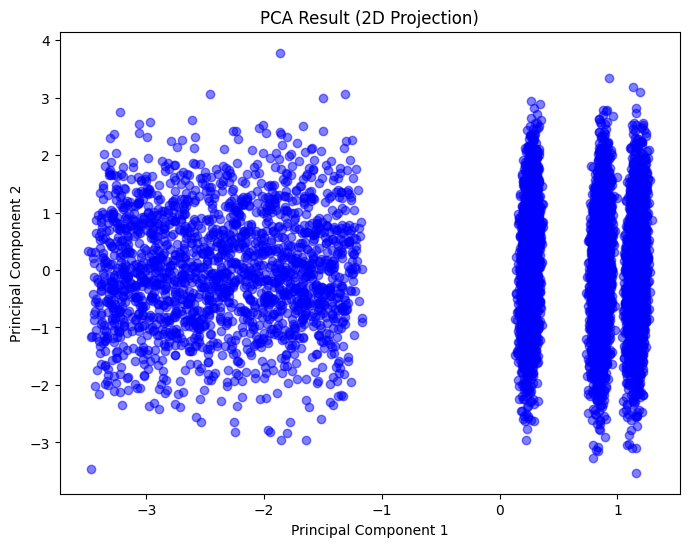

In [ ]:
# -----------------------------
# 4. VISUALIZATION
# -----------------------------

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, c='blue')
plt.title("PCA Result (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Selected features (SelectKBest):
[[  1 100]
 [  2 200]
 [  3 300]
 [  4 400]
 [  5 500]]
PCA reduced data:
[[-2.01007463e+02 -2.69618663e-15]
 [-1.00503731e+02  8.98728878e-16]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 1.00503731e+02 -8.98728878e-16]
 [ 2.01007463e+02 -1.79745776e-15]]


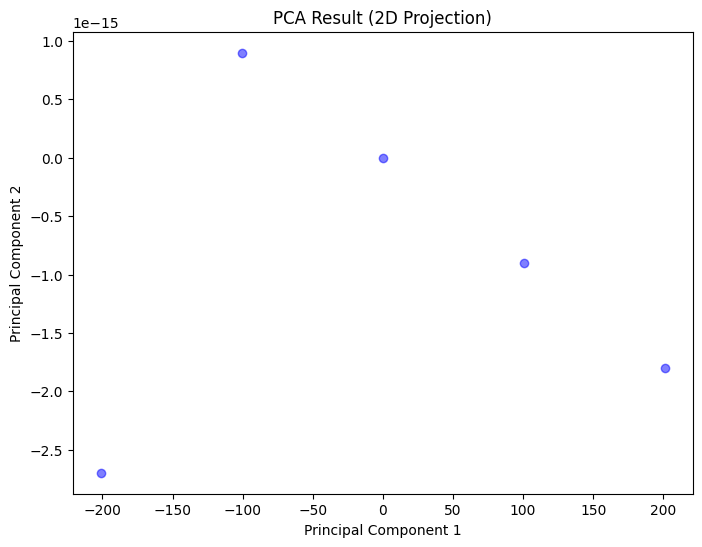

In [ ]:
# Creating a manual dataset
data = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [1, 2, 3, 4, 5],
    'feature3': [100, 200, 300, 400, 500],
    'target': [0, 1, 0, 1, 0]
	})

# Feature selection using SelectKBest
selector = SelectKBest(chi2, k=2)
selected_features = selector.fit_transform(data[['feature1', 'feature2', 'feature3']], data['target'])

# Printing selected features
print("Selected features (SelectKBest):")
print(selected_features)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['feature1', 'feature2', 'feature3']])

# Printing PCA results
print("PCA reduced data:")
print(pca_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.5, c='blue')
plt.title("PCA Result (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()